# This section is how to load the data

In [51]:
####### THIS SECTION LOADS THE DATA FROM QUANDL###########3
import pandas as pd
import quandl
import datetime

# We will look at stock prices over the past year
start = datetime.datetime(2004,1,1)
end = datetime.date.today()
#end = datetime.datetime(2013,1,1)

s = ["GOLD_DAILY_USD", "SILVER", "PALL", "REALYIELD"]
y = ["WGC/","LBMA/", "JOHNMATT/", "USTREASURY/"]
stockIndex = pd.DataFrame()

print(type(stockIndex))

for indx, a in enumerate(y):
    dummy = quandl.get(a + s[indx], start_date=start, end_date=end)
    stockIndex = pd.concat([stockIndex, dummy], axis=1, sort=False)

######### This data is not free ###################################
#stockIndex = quandl.get("QRM/WPM", start_date=start, end_date=end)
###################################################################


print(stockIndex)
print(stockIndex.corr(method="pearson"))
stockIndex.to_csv("stockIndex.csv")
stockIndex.corr(method="pearson").to_csv("stockCorr.csv")



<class 'pandas.core.frame.DataFrame'>
              Value     USD       GBP      EURO  Hong Kong 8:30  \
Date                                                              
2004-01-01   416.25     NaN       NaN       NaN             NaN   
2004-01-02   415.25   5.985   3.35200   4.75000           196.0   
2004-01-05   420.60   5.975   3.31944   4.71029           198.0   
2004-01-06   424.40   6.280   3.44865   4.92549           203.0   
2004-01-07   421.75   6.215   3.42613   4.90722           201.0   
2004-01-08   421.00   6.200   3.42069   4.92454           202.0   
2004-01-09   423.35   6.245   3.39956   4.89804           204.0   
2004-01-12   425.25   6.650   3.58781   5.17107           205.0   
2004-01-13   425.50   6.615   3.58634   5.19639           215.0   
2004-01-14   419.50   6.545   3.56481   5.15964           221.0   
2004-01-15   412.50   6.315   3.46122   4.99802           217.0   
2004-01-16   408.40   6.205   3.42439   4.96400           211.0   
2004-01-19   406.60   6.

# This section is to plot the data

Populating the interactive namespace from numpy and matplotlib


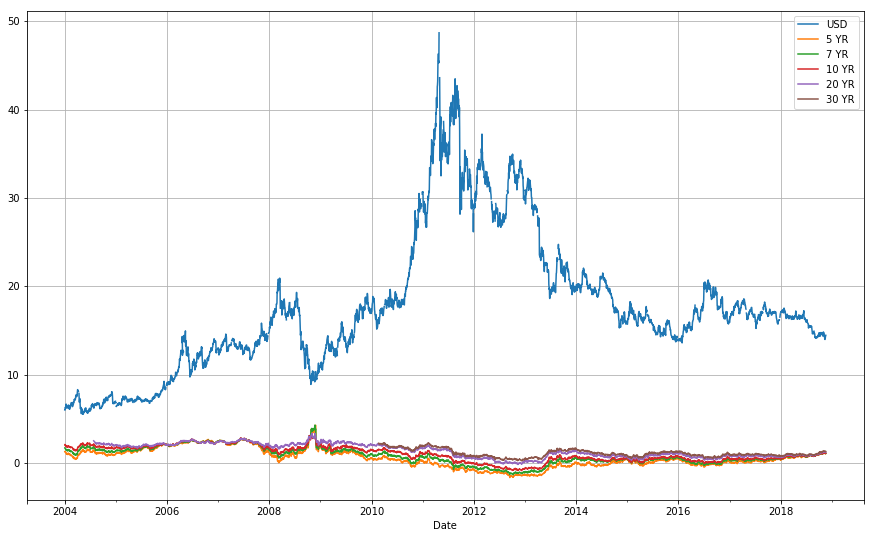

In [52]:
######### THIS SECTION PLOT THE DATA ###########################

import matplotlib.pyplot as plt   # Import matplotlib

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
#stockIndex["Value"].plot(grid = True) # Plot the adjusted closing price of AAPL
#stockIndex["Adj. High"].plot(grid = True)
#stockIndex["USD"].plot(grid = True)
#stockIndex["New York 9:30"].plot(grid = True)
#LT Real Average (>10Yrs)
#stockIndex["LT Real Average (>10Yrs)"].plot(grid = True)

stockIndex.plot(y=["USD", "5 YR", "7 YR", "10 YR", "20 YR", "30 YR"], grid=True)

In [7]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple, adj=True, stick="month")

ModuleNotFoundError: No module named 'mpl_finance'